# Explore the network files

**November ??, 2016**

The goal is to learn networkx functions by exploring the five network files. Each section of the notebook has a task to complete.

## List the network files
The Python `glob` module can be used to find all network input files that match a filename pattern that includes wildcards.  Use `glob` to obtain all of the filenames without hard-coding `network1.txt`, `network2.txt`, etc.  Print the list of filenames.

In [37]:
import networkx as nx
import os, glob

for filename in glob.glob('../Data/network?.txt'):
    print(filename)

../Data\network1.txt
../Data\network2.txt
../Data\network3.txt
../Data\network4.txt
../Data\network5.txt
../Data\network6.txt
../Data\network7.txt
../Data\network8.txt


## Load the network files
Define a function that will use the `networkx` module to create an undirected Graph (https://networkx.readthedocs.io/en/stable/reference/classes.graph.html) object for each network file.  Given a filename, the function will return the constructed Graph.

Next, iterate through the list of files and create a list of Graphs.  It will be helpful later to sort the list of filenames first.

In [38]:
 def CreateUndirectedGraph (file):
    fh=open(file, 'rb')
    G=nx.read_adjlist(fh)
    fh.close()
    return G

GraphList = []
for filename in glob.glob('../Data/network?.txt'):
    graph = CreateUndirectedGraph(filename)
    GraphList.append(graph)
    print (filename)
    print (graph.edges())

../Data\network1.txt
[('E', 'G'), ('E', 'F'), ('A', 'B'), ('C', 'D'), ('G', 'H'), ('G', 'F')]
../Data\network2.txt
[('E', 'B'), ('E', 'C'), ('E', 'A'), ('E', 'D'), ('E', 'F'), ('A', 'C'), ('A', 'B'), ('A', 'D'), ('A', 'F'), ('C', 'B'), ('C', 'D'), ('C', 'F'), ('B', 'D'), ('B', 'F'), ('D', 'F')]
../Data\network3.txt
[('E', 'A'), ('H', 'G'), ('L', 'G'), ('D', 'A'), ('A', 'C'), ('A', 'B'), ('A', 'F'), ('J', 'G'), ('K', 'G'), ('G', 'I'), ('G', 'F')]
../Data\network4.txt
[('E', 'C'), ('E', 'D'), ('A', 'B'), ('C', 'B'), ('C', 'G'), ('G', 'F')]
../Data\network5.txt
[('D', 'E'), ('D', 'C'), ('C', 'B'), ('B', 'A')]
../Data\network6.txt
[('E', 'G'), ('E', 'D'), ('E', 'F'), ('H', 'G'), ('C', 'B'), ('C', 'D'), ('B', 'A'), ('G', 'F')]
../Data\network7.txt
[('E', 'C'), ('E', 'B'), ('E', 'D'), ('E', 'F'), ('H', 'G'), ('A', 'D'), ('D', 'C'), ('D', 'B'), ('D', 'F'), ('J', 'G'), ('K', 'G'), ('C', 'B'), ('C', 'F'), ('B', 'F'), ('G', 'I'), ('G', 'L'), ('G', 'F')]
../Data\network8.txt
[('Y', 'E'), ('Y', 'H

## Draw each of the graphs
Iterate through the graphs and use the `networkx` `draw` function (http://networkx.readthedocs.io/en/stable/reference/generated/networkx.drawing.nx_pylab.draw.html) to visualize them.

Populating the interactive namespace from numpy and matplotlib
../Data\network1.txt


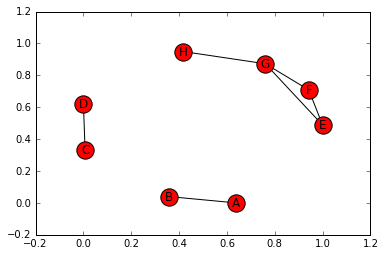

../Data\network2.txt


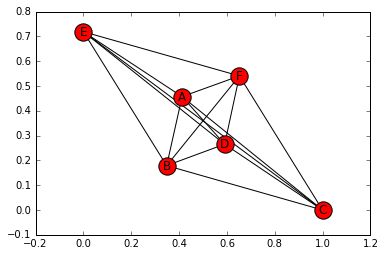

../Data\network3.txt


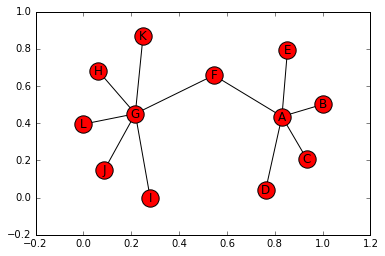

../Data\network4.txt


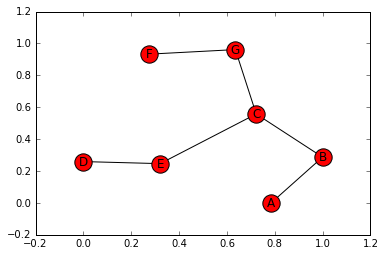

../Data\network5.txt


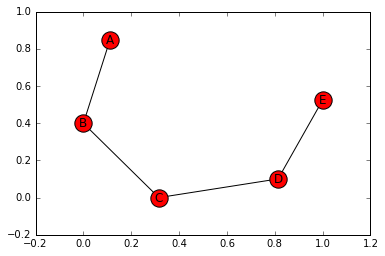

../Data\network6.txt


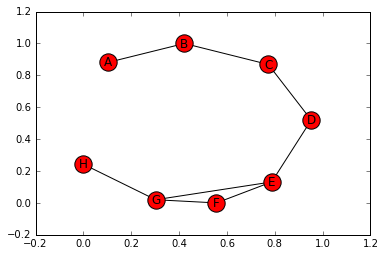

../Data\network7.txt


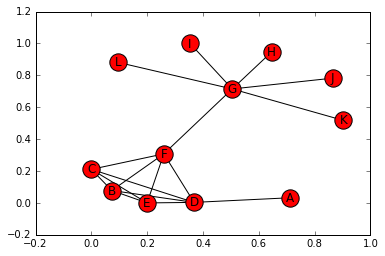

../Data\network8.txt


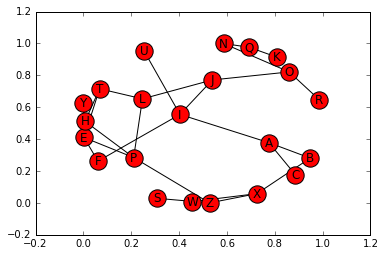

In [39]:
%pylab inline
filelist = []
for filename in glob.glob('../Data/network?.txt'):
    filelist.append(filename)

i = 0
for graphing in GraphList:
    print (filelist[i])
    i = i + 1
    nx.draw_networkx(graphing)
    plt.show()

## Explore simple properites of network 3
Use existing `networkx` functions (http://networkx.readthedocs.io/en/stable/reference/functions.html and http://networkx.readthedocs.io/en/stable/reference/classes.graph.html#methods) to explore the topology of network 3.  Show:
- The number of nodes and edges
- The neighbors of node **A**
- The neighbors of node **F**
- The degrees of all nodes
- The common neighbors of **A** and **G**

In [40]:
#print (filelist)
pos = filelist.index("../Data\\network3.txt")
net3 = GraphList[pos]
print ("The number of nodes are",net3.number_of_nodes(), "and the number of edges are", net3.number_of_edges())
#print (net3.nodes())

#Finds the neighbors of node A
print (net3.neighbors('A'), " are neighbors of node A")

#Finds the neighbors of node F
print (net3.neighbors('F'), " are neighbors of node F")

#Finds the degrees of all nodes
print ("The degrees of all nodes are", net3.degree())

#Finds the common neighbots of A and G
Aneighbor = net3.neighbors('A')
Gneighbor = net3.neighbors('G')

common = []
for val in Aneighbor:
        if val in Gneighbor:
            common.append(val) 
if not common:
    print ("There are no common neighbors of A and G")
print ("The common neighbor(s) of A and G are", common)


The number of nodes are 12 and the number of edges are 11
['E', 'C', 'B', 'D', 'F']  are neighbors of node A
['G', 'A']  are neighbors of node F
The degrees of all nodes are {'E': 1, 'H': 1, 'A': 5, 'D': 1, 'J': 1, 'K': 1, 'C': 1, 'B': 1, 'G': 6, 'L': 1, 'I': 1, 'F': 2}
The common neighbor(s) of A and G are ['F']


## Explore more complex properties of network 3
Use existing `networkx` functions (http://networkx.readthedocs.io/en/stable/reference/algorithms.centrality.html#betweenness and http://networkx.readthedocs.io/en/stable/reference/algorithms.distance_measures.html and http://networkx.readthedocs.io/en/stable/reference/algorithms.component.html) to explore the topology of network 3.  Show:
- Betweenness centrality of all nodes
- The number of connected components
- The diameter
- The graph center

In [41]:
#Testing nx.number_connected_components(G)
pos = filelist.index("../Data\\network3.txt")
net3 = GraphList[pos]

print ("The number of connected components", nx.number_connected_components(net3))

The number of connected components 1


In [42]:
#Print the degree centrality for nodes
#print (nx.degree_centrality(net3))

#print the shortest-path betweenness centrality for nodes
print ("Betweenness centrality of all nodes", nx.betweenness_centrality(net3))

#prints the number of connected components
#why is the number of connected components 1?
print ("The number of connected components", nx.number_connected_components(net3))

#prints the diameter of network 3
print ("The diameter", nx.diameter(net3))

#prints the center of network 3
print ("The graph center", nx.center(net3))

Betweenness centrality of all nodes {'E': 0.0, 'H': 0.0, 'A': 0.6181818181818182, 'D': 0.0, 'J': 0.0, 'K': 0.0, 'C': 0.0, 'B': 0.0, 'G': 0.7272727272727273, 'L': 0.0, 'I': 0.0, 'F': 0.5454545454545454}
The number of connected components 1
The diameter 4
The graph center ['F']


## Create a new network with union
Create network 6 by taking the union of network 1 and network 5 (http://networkx.readthedocs.io/en/stable/reference/algorithms.operators.html).  Draw the new graph.

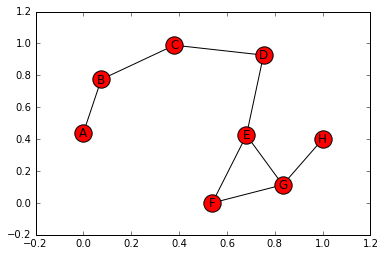

In [43]:
f1 = filelist.index("../Data\\network1.txt")
G = GraphList[f1]
#print (G.edges()) 
f5 = filelist.index("../Data\\network5.txt")
H = GraphList[f5]
#print (H.edges())
R=G.copy()

R.remove_nodes_from(n for n in G if n in H)
#print (R.edges())

I = nx.compose(G,H,name=None)
#print (I.edges())

nx.write_adjlist(I,'../Data/network6.txt')
net6graphing=nx.read_adjlist('../Data/network6.txt')
nx.draw_networkx(net6graphing)
plt.show()

## Create a new network with difference
Create network 7 by taking the symmetric difference of network 2 and network 3 (http://networkx.readthedocs.io/en/stable/reference/algorithms.operators.html).  Draw the new graph.

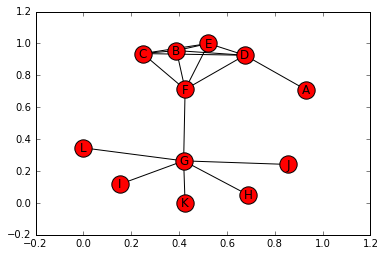

In [44]:
f2 = filelist.index("../Data\\network2.txt")
net2 = GraphList[f2]
G = net2.edges()
#print (G) 
f3 = filelist.index("../Data\\network3.txt")
net3 = GraphList[f3]
H = net3.edges()
#print (H)

R=net2.copy()
R.remove_edges_from(n for n in G if n not in H)
#print (R.edges())
EdgeR = R.edges()

copy = net2.copy()
copy.remove_edges_from(n for n in EdgeR if n in G)
#print ("\n",copy.edges())
strcopy = copy.edges()

copy2 = net3.copy()
copy2.remove_edges_from(n for n in EdgeR if n in H)
#print ("\n",copy2.edges())
strcopy2 = copy2.edges()

dif = nx.Graph()
dif.add_edges_from(strcopy)
dif.add_edges_from(strcopy2)
#print (dif.edges())

nx.write_adjlist(dif,'../Data/network7.txt')
net7graphing=nx.read_adjlist('../Data/network7.txt')
nx.draw_networkx(net7graphing)
plt.show()

## Create a new network
Create network 8 by creating a new empty Graph and adding any nodes and edges you would like (http://networkx.readthedocs.io/en/stable/reference/classes.graph.html#methods).  Use node names in the range **A** to **Z**.  Draw the new graph.

[('Y', 'E'), ('Y', 'H'), ('E', 'T'), ('E', 'P'), ('E', 'F'), ('U', 'I'), ('Z', 'X'), ('Z', 'P'), ('Z', 'S'), ('N', 'Q'), ('N', 'O'), ('A', 'C'), ('A', 'I'), ('X', 'B'), ('X', 'W'), ('H', 'T'), ('H', 'P'), ('L', 'T'), ('L', 'P'), ('L', 'J'), ('I', 'J'), ('I', 'F'), ('J', 'O'), ('T', 'T'), ('K', 'Q'), ('R', 'O')]
[('Y', 'E'), ('Y', 'H'), ('E', 'T'), ('E', 'P'), ('E', 'F'), ('U', 'I'), ('Z', 'X'), ('Z', 'P'), ('Z', 'S'), ('N', 'Q'), ('N', 'O'), ('A', 'C'), ('A', 'I'), ('A', 'B'), ('X', 'B'), ('X', 'W'), ('H', 'T'), ('H', 'P'), ('L', 'T'), ('L', 'P'), ('L', 'J'), ('I', 'J'), ('I', 'F'), ('J', 'O'), ('T', 'T'), ('K', 'Q'), ('R', 'O')]


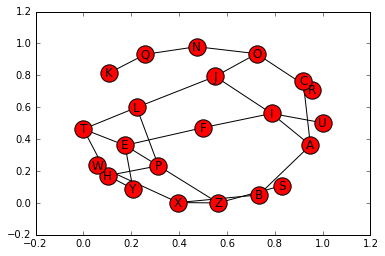

In [45]:
net8 = nx.Graph()
nodes8=['E','B','N','Y','W','T','T','I','O','L','Y','I','J','R','T','Z','S','P','P','L','K','T','A','P','I','A']
net8.add_nodes_from(nodes8)
path8=['F','X','Q','H','X','L','H','F','N','J','E','J','O','O','E','X','Z','Z','E','P','Q','T','C','H','U','I']
dict8 = zip(nodes8, path8)
net8.add_edges_from(dict8)
print (net8.edges())
net8.add_edge('A','B')
print (net8.edges())

nx.write_adjlist(net8,'../Data/network8.txt')
net8graphing=nx.read_adjlist('../Data/network8.txt')
nx.draw_networkx(net8graphing)
plt.show()

## Summarizing graph properties
Create a `pandas` dataframe that summarizes the 8 graphs' properties.  Each column represents a different graph attribute.  Each row corresponds to a graph.  Include the following attributes in the columns:
- Number of nodes
- Number of edges
- Graph diameter
- Number of connected components
- Maximum degree (max over all node degrees)

In [46]:
import pandas as pd
import numpy as np
glist = []
for filename in glob.glob('../Data/network?.txt'):
    glist.append(filename)
print (glist)

s = pd.DataFrame(data = glist, columns=['Graph'])
s[:len(s)-1]

nodeslist = []
edgeslist = []
diameterlist = []
connectedc= []
maxd = []
for filename in glob.glob('../Data/network?.txt'):
    graph = CreateUndirectedGraph(filename)
    nodeslist.append(graph.number_of_nodes())
    edgeslist.append(graph.number_of_edges())
    if nx.number_connected_components(graph) == 1:
        diameterlist.append(nx.diameter(graph))
    else:
        diameterlist.append(np.nan)
    connectedc.append(nx.number_connected_components(graph))
    x = graph.degree()
    maximum = max(x, key=x.get)
    maxd.append(x[maximum])
    
    
print (nodeslist)
s['Number of nodes'] = nodeslist
s['Number of edges'] = edgeslist
s['Graph diameter'] = diameterlist
s['Number of connected components'] = connectedc
s['Maximum degree (max over all node degrees)'] = maxd
print (s.describe())

s[:len(s)-1]

['../Data\\network1.txt', '../Data\\network2.txt', '../Data\\network3.txt', '../Data\\network4.txt', '../Data\\network5.txt', '../Data\\network6.txt', '../Data\\network7.txt', '../Data\\network8.txt']
[8, 6, 12, 7, 5, 8, 12, 22]
       Number of nodes  Number of edges  Graph diameter  \
count         8.000000         8.000000        7.000000   
mean         10.000000        11.750000        4.571429   
std           5.477226         7.667184        2.439750   
min           5.000000         4.000000        1.000000   
25%           6.750000         6.000000        4.000000   
50%           8.000000         9.500000        4.000000   
75%          12.000000        15.500000        5.000000   
max          22.000000        27.000000        9.000000   

       Number of connected components  \
count                        8.000000   
mean                         1.250000   
std                          0.707107   
min                          1.000000   
25%                          1.000

,Graph,Number of nodes,Number of edges,Graph diameter,Number of connected components,Maximum degree (max over all node degrees)
0,../Data\network1.txt,8,6,NaN,3,3
1,../Data\network2.txt,6,15,1.0,1,5
2,../Data\network3.txt,12,11,4.0,1,6
3,../Data\network4.txt,7,6,4.0,1,3
4,../Data\network5.txt,5,4,4.0,1,2
5,../Data\network6.txt,8,8,6.0,1,3
6,../Data\network7.txt,12,17,4.0,1,6
